In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("airline-passenger-traffic.csv",header=None)
data.columns =['Month','Passengers']
data['Month']= pd.to_datetime(data['Month'],format ="%Y-%m")
data = data.set_index('Month')
data.head()

,Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


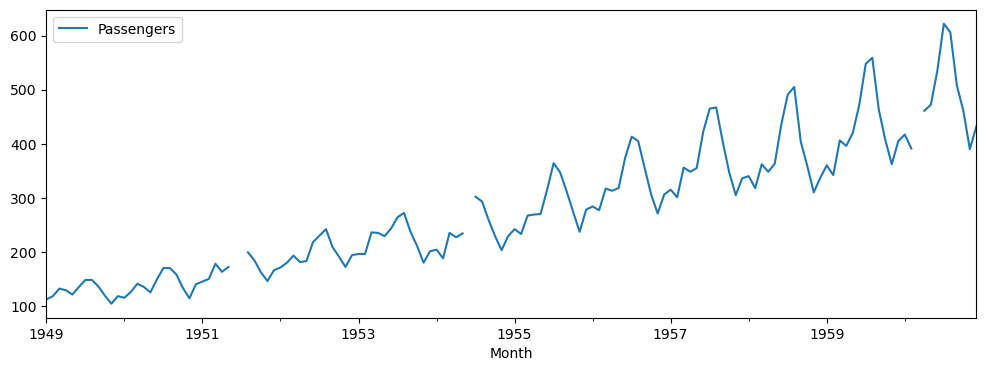

In [3]:
data.plot(figsize=(12,4))
plt.legend(loc='best')
plt.show(block=False)

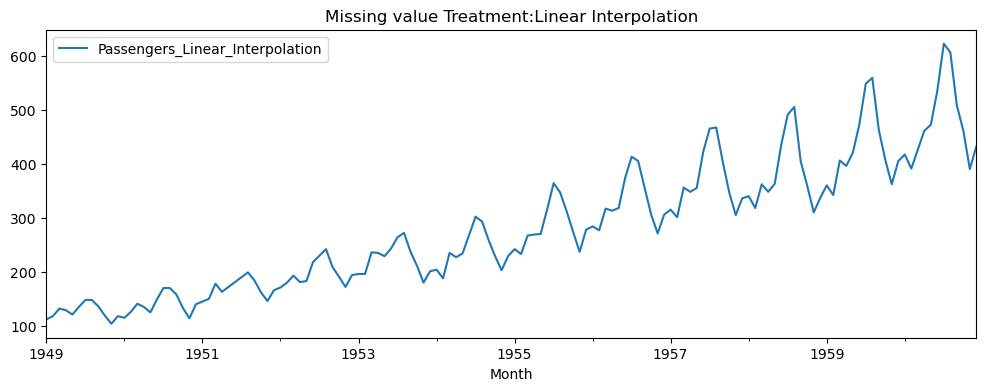

In [4]:
data = data.assign(Passengers_Linear_Interpolation = data.Passengers.interpolate(method='linear'))
data[['Passengers_Linear_Interpolation']].plot(figsize=(12,4))
plt.legend(loc='best')
plt.title('Missing value Treatment:Linear Interpolation')
plt.show(block =False)

In [5]:
data['Passengers']=data['Passengers_Linear_Interpolation']

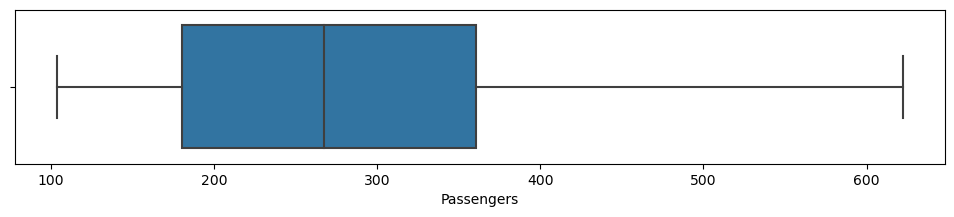

In [6]:
import seaborn as sns
fig = plt.subplots(figsize=(12,2))
ax = sns.boxplot(x=data['Passengers'],whis = 1.5)

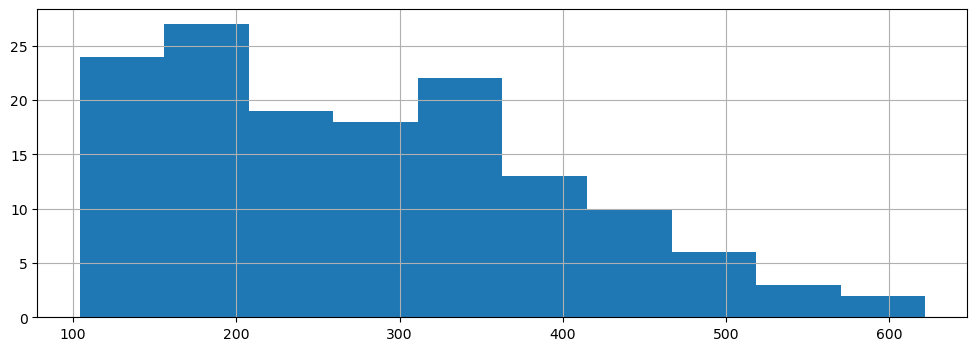

In [7]:
fig = data.Passengers.hist(figsize=(12,4))

In [8]:
train_len = 120
train = data[0:train_len]
test = data[train_len:]

In [9]:
y_hat_navie = test.copy()
y_hat_navie['navie_forecast']=train['Passengers'][train_len - 1]

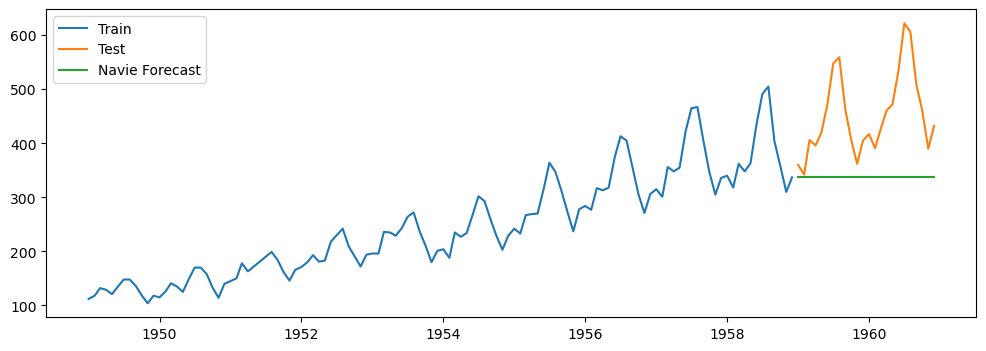

In [10]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'],label = 'Train')
plt.plot(test['Passengers'],label = 'Test')
plt.plot(y_hat_navie['navie_forecast'],label= 'Navie Forecast')
plt.legend(loc = 'best')
plt.title = ('Navie Method')
plt.show()

In [11]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast']=train['Passengers'].mean()

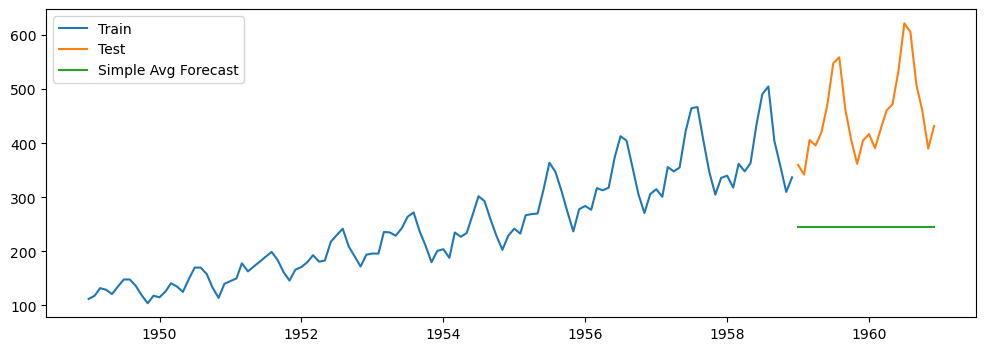

In [12]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'],label = 'Train')
plt.plot(test['Passengers'],label = 'Test')
plt.plot(y_hat_avg['avg_forecast'],label= 'Simple Avg Forecast')
plt.legend(loc = 'best')
plt.title = ('Simple Avg Forecast')
plt.show()